<a href="https://colab.research.google.com/github/NaveenShetter1/Machine-Leaning-Notebooks/blob/main/NaiveBayes2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
df=pd.read_csv('/content/Churn_Modelling.csv')

In [85]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [86]:
df=df.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [87]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [89]:
# convert categorical column to numerical

In [92]:
for i in df.select_dtypes(include=['object']):
  df[i]=df[i].astype('category')
  df[i]=df[i].cat.codes
  df=pd.get_dummies(df,columns=['Gender','Geography'])

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Age              10000 non-null  int64  
 2   Tenure           10000 non-null  int64  
 3   Balance          10000 non-null  float64
 4   NumOfProducts    10000 non-null  int64  
 5   HasCrCard        10000 non-null  int64  
 6   IsActiveMember   10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  float64
 8   Exited           10000 non-null  int64  
 9   Gender_Female    10000 non-null  bool   
 10  Gender_Male      10000 non-null  bool   
 11  Geography_0      10000 non-null  bool   
 12  Geography_1      10000 non-null  bool   
 13  Geography_2      10000 non-null  bool   
dtypes: bool(5), float64(2), int64(7)
memory usage: 752.1 KB


In [94]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_0,Geography_1,Geography_2
0,619,42,2,0.00,1,1,1,101348.88,1,True,False,True,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,True,False,False,False,True
2,502,42,8,159660.80,3,1,0,113931.57,1,True,False,True,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,True,False,True,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,True,False,False,False,True


In [95]:
# df=pd.get_dummies(df,columns=['Gender','Geography'])

In [96]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_0,Geography_1,Geography_2
0,619,42,2,0.00,1,1,1,101348.88,1,True,False,True,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,True,False,False,False,True
2,502,42,8,159660.80,3,1,0,113931.57,1,True,False,True,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,True,False,True,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,True,False,False,False,True


In [97]:
# exited is target so 1 means no continueing by user

In [98]:
x=df.drop(['Exited'],axis=1)

In [99]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Female,Gender_Male,Geography_0,Geography_1,Geography_2
0,619,42,2,0.00,1,1,1,101348.88,True,False,True,False,False
1,608,41,1,83807.86,1,0,1,112542.58,True,False,False,False,True
2,502,42,8,159660.80,3,1,0,113931.57,True,False,True,False,False
3,699,39,1,0.00,2,0,0,93826.63,True,False,True,False,False
4,850,43,2,125510.82,1,1,1,79084.10,True,False,False,False,True


In [100]:
y=df['Exited']

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=47)

In [103]:
print(x_test.shape)
print(x_test[:5])  # Print first 5 rows


(2000, 13)
      CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
7432          724   31       2  160997.54              2          0   
5444          698   33       5  135658.73              2          0   
5448          608   44       5  126147.84              1          0   
8654          586   42       6  126704.49              2          1   
7543          777   43       1       0.00              2          1   

      IsActiveMember  EstimatedSalary  Gender_Female  Gender_Male  \
7432               1         64831.36          False         True   
5444               1         39755.00          False         True   
5448               1        132424.69           True        False   
8654               0         41682.30          False         True   
7543               0         21785.91          False         True   

      Geography_0  Geography_1  Geography_2  
7432        False         True        False  
5444         True        False        False  
5448     

In [104]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
x_train = scaler.fit_transform(x_train)  # Fit on training data
x_test = scaler.transform(x_test)  # Only transform test data


In [105]:
from sklearn.naive_bayes import GaussianNB

In [106]:
x_test.shape

(2000, 13)

In [107]:
nb=GaussianNB()
nb.fit(x_train,y_train)
y_pred=nb.predict(x_test)

In [115]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, precision_score

In [110]:
accuracy_score(y_test,y_pred)

0.802

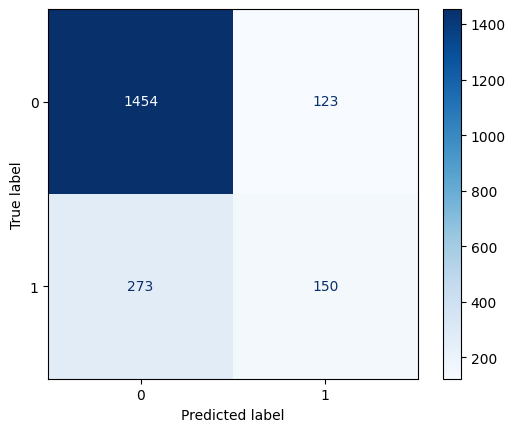

In [111]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot(cmap='Blues')

In [112]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.84      0.92      0.88      1577\n           1       0.55      0.35      0.43       423\n\n    accuracy                           0.80      2000\n   macro avg       0.70      0.64      0.66      2000\nweighted avg       0.78      0.80      0.79      2000\n'

In [116]:
precision_score(y_test,y_pred)a

0.5494505494505495